# **CAPÍTULO 11: PRUEBA DE TU CÓDIGO**
* Instalación de pytest con pip
* Actualización de pip
* Instalación de pytest
* Pruebas de una función
* Pruebas unitarias y casos de prueba
* Una prueba que pasa
* Ejecutar una prueba
* Una prueba que falla
* Responder a una prueba fallida
* Agregar nuevas pruebas
* Ejercicio 11-1: Ciudad, País
* Ejercicio 11-2: Población
* Pruebas de una clase
* Una variedad de afirmaciones
* Una clase para probar
* Pruebas para la clase AnonymousSurvey
* Uso de fixtures
* Ejercicio 11-3: Empleado
* Resumen

# Probando tu codigo

Cuando escribes una función o una clase, también puedes escribir pruebas para ese código. Probarlo demuestra que tu código funciona como se supone que debe hacerlo en respuesta a todos los tipos de entradas para los que está diseñado. Cuando escribes pruebas, puedes estar seguro de que tu código funcionará correctamente a medida que más personas comiencen a usar tus programas. También podrás probar el nuevo código que añadas para asegurarte de que los cambios no rompan el comportamiento existente de tu programa. Todo programador comete errores, por lo que es fundamental probar el código con frecuencia para detectar problemas antes de que los usuarios los encuentren.  

En este capítulo, aprenderás a probar tu código utilizando **pytest**. La biblioteca pytest es un conjunto de herramientas que te ayudará a escribir tus primeras pruebas de manera rápida y sencilla, al tiempo que respalda tus pruebas a medida que estas crecen en complejidad junto con tus proyectos. Python no incluye pytest de forma predeterminada, así que aprenderás a instalar bibliotecas externas. Saber cómo instalar bibliotecas externas te hará tener acceso a una amplia variedad de código bien diseñado. Estas bibliotecas ampliarán enormemente los tipos de proyectos en los que puedes trabajar.  

Aprenderás a construir una serie de pruebas y a comprobar que cada conjunto de entradas da como resultado la salida que deseas. Verás cómo se ve una prueba que pasa y cómo se ve una prueba que falla, y aprenderás cómo una prueba fallida puede ayudarte a mejorar tu código. Aprenderás a probar funciones y clases, y comenzarás a entender cuántas pruebas debes escribir para un proyecto.  

# Instalación de pytest con pip  

Aunque Python incluye mucha funcionalidad en la biblioteca estándar, los desarrolladores de Python también dependen en gran medida de paquetes de terceros. Un paquete de terceros es una biblioteca desarrollada fuera del núcleo del lenguaje Python. Algunas bibliotecas populares de terceros eventualmente son adoptadas en la biblioteca estándar y terminan incluidas en la mayoría de las instalaciones de Python desde ese momento en adelante. Esto sucede más a menudo con bibliotecas que son poco propensas a cambiar una vez que se han solucionado sus errores iniciales. Estas bibliotecas pueden evolucionar al mismo ritmo que el lenguaje en general.  

Sin embargo, muchos paquetes se mantienen fuera de la biblioteca estándar para que puedan desarrollarse en un cronograma independiente del lenguaje. Estos paquetes tienden a actualizarse con más frecuencia de lo que lo harían si estuvieran ligados al calendario de desarrollo de Python. Esto es cierto para pytest y para la mayoría de las bibliotecas que utilizaremos en la segunda mitad de este libro. No deberías confiar ciegamente en todos los paquetes de terceros, pero tampoco deberías desanimarte por el hecho de que gran parte de la funcionalidad importante se implemente a través de dichos paquetes.  

# Actualizando pip  

Python incluye una herramienta llamada **pip** que se utiliza para instalar paquetes de terceros. Como pip ayuda a instalar paquetes de recursos externos, se actualiza con frecuencia para abordar posibles problemas de seguridad. Así que comenzaremos actualizando pip.  

Abre una nueva ventana de terminal y ejecuta el siguiente comando:  

```bash

$ python -m pip install --upgrade pip
1 Requirement already satisfied: pip in /.../python3.11/site-packages (22.0.4)
--snip--
2 Successfully installed pip-22.1.2
```

**N O T A**:

Desde esta parte del libro se comenzara a avanzar desde el ambiente virtual. Se omiten estos primeros pasos de la intalaciòn de pip debido a que el virtualenv ya tiene instaladas estas dependencias.

La primera parte de este comando, **`python -m pip`**, le indica a Python que ejecute el módulo **`pip`**. La segunda parte, **`install --upgrade`**, le indica a **`pip`** que actualice un paquete que ya ha sido instalado. La última parte, **`pip`**, especifica qué paquete de terceros debe ser actualizado.  

El resultado muestra que mi versión actual de **`pip`**, la versión 22.0.4, fue reemplazada por la última versión disponible en el momento de escribir esto, la 22.1.2.  

Puedes usar este comando para actualizar cualquier paquete de terceros instalado en tu sistema:  

```bash
$ python -m pip install --upgrade package_name
```

**N O T A**  

Si estás usando Linux, es posible que **`pip`** no esté incluido en tu instalación de Python. Si obtienes un error al intentar actualizar **`pip`**, consulta las instrucciones en el Apéndice A.  

# Instalando **pytest**  

Ahora que **`pip`** está actualizado, podemos instalar **`pytest`**:  

```bash
$ python -m pip install --user pytest  
Collecting pytest  
--snip--  
Successfully installed attrs-21.4.0 iniconfig-1.1.1 ...pytest-7.x.x  
```  

Todavía estamos utilizando el comando principal **`pip install`**, pero esta vez sin el indicador **`--upgrade`**. En su lugar, estamos usando el indicador **`--user`**, que le indica a Python que instale este paquete solo para el usuario actual.  

El resultado muestra que la última versión de **`pytest`** se instaló correctamente, junto con una serie de otros paquetes de los que **`pytest`** depende.  

Puedes usar este comando para instalar muchos paquetes de terceros:  

```bash
$ python -m pip install --user package_name  
```

**N O T A**  

Si tienes algún problema al ejecutar este comando, intenta ejecutarlo sin el indicador `--user`.  

# Probar una Función

Para aprender sobre pruebas, necesitamos código para probar. Aquí tienes una función sencilla que toma un nombre y un apellido, y devuelve un nombre completo con formato adecuado:  

```python
# name_function.py
def get_formatted_name(first, last):
    """Genera un nombre completo con formato adecuado."""
    full_name = f"{first} {last}"
    return full_name.title()
```

La función `get_formatted_name()` combina el nombre y el apellido con un espacio entre ellos para formar un nombre completo, luego lo capitaliza y lo devuelve. Para verificar que `get_formatted_name()` funcione, hagamos un programa que use esta función. El programa `names.py` permite a los usuarios ingresar un nombre y un apellido, y ver un nombre completo con formato adecuado:  

```python
# names.py
from name_function import get_formatted_name

print("Ingresa 'q' en cualquier momento para salir.")
while True:
    first = input("\nPor favor, dame un nombre: ")
    if first == 'q':
        break
    last = input("Por favor, dame un apellido: ")
    if last == 'q':
        break

    formatted_name = get_formatted_name(first, last)
    print(f"\tNombre con formato adecuado: {formatted_name}.")
```

Este programa importa `get_formatted_name()` desde `name_function.py`. El usuario puede ingresar una serie de nombres y apellidos y ver los nombres completos formateados que se generan:  

```python
Ingresa 'q' en cualquier momento para salir.
Por favor, dame un nombre: janis
Por favor, dame un apellido: joplin
    Nombre con formato adecuado: Janis Joplin.
Por favor, dame un nombre: bob
Por favor, dame un apellido: dylan
    Nombre con formato adecuado: Bob Dylan.
Por favor, dame un nombre: q
```

Podemos ver que los nombres generados aquí son correctos. Pero, supongamos que queremos modificar `get_formatted_name()` para que también maneje nombres intermedios. Al hacerlo, queremos asegurarnos de no romper la forma en que la función maneja los nombres que tienen solo un nombre y un apellido.  

Podríamos probar nuestro código ejecutando `names.py` e ingresando un nombre como "Janis Joplin" cada vez que modifiquemos `get_formatted_name()`, pero eso se volvería tedioso.  

Afortunadamente, **pytest** proporciona una forma eficiente de automatizar las pruebas de la salida de una función. Si automatizamos las pruebas de `get_formatted_name()`, siempre podremos estar seguros de que la función funcionará correctamente cuando se le den los tipos de nombres para los que hemos escrito pruebas.

# Pruebas Unitarias y Casos de Prueba

Existen una gran variedad de enfoques para probar software. Uno de los tipos más sencillos de prueba es una **prueba unitaria**. Una prueba unitaria verifica que un aspecto específico del comportamiento de una función sea correcto. Un **caso de prueba** es una colección de pruebas unitarias que, juntas, demuestran que una función se comporta como se espera dentro de todas las situaciones posibles que se espera que maneje.

Un buen caso de prueba considera todos los posibles tipos de entrada que una función podría recibir e incluye pruebas para representar cada una de estas situaciones. Un caso de prueba con cobertura completa incluye un rango completo de pruebas unitarias que cubren todas las formas posibles en que se puede usar una función. Lograr una cobertura completa en un proyecto grande puede ser abrumador. A menudo es suficiente escribir pruebas para los comportamientos críticos de tu código y luego aspirar a una cobertura completa solo si el proyecto empieza a tener un uso generalizado.

# Una prueba que pasa

Con pytest, escribir tu primera prueba unitaria es bastante sencillo. Escribiremos una única función de prueba. La función de prueba llamará a la función que estamos probando, y haremos una afirmación sobre el valor que se devuelve. Si nuestra afirmación es correcta, la prueba pasará; si la afirmación es incorrecta, la prueba fallará. Aquí está la primera prueba de la función `get_formatted_name()`:


```python
# test_name_function.py

from name_function import get_formatted_name

def test_first_last_name():
    """¿Funcionan nombres como 'Janis Joplin'?"""
    formatted_name = get_formatted_name('janis', 'joplin')
    assert formatted_name == 'Janis Joplin'
```

Antes de ejecutar la prueba, echemos un vistazo más de cerca a esta función. El nombre de un archivo de prueba es importante; debe comenzar con `test_`. Cuando le pedimos a pytest que ejecute las pruebas que hemos escrito, buscará cualquier archivo que comience con `test_` y ejecutará todas las pruebas que encuentre en ese archivo.

En el archivo de prueba, primero importamos la función que queremos probar: `get_formatted_name()`. Luego definimos una función de prueba: en este caso, `test_first_last_name()`. Este es un nombre de función más largo que los que hemos estado utilizando, y por una buena razón. Primero, las funciones de prueba deben comenzar con la palabra `test`, seguida de un guion bajo. Cualquier función que comience con `test_` será descubierta por pytest y se ejecutará como parte del proceso de prueba.

Además, los nombres de las funciones de prueba deben ser más largos y descriptivos que un nombre típico de función. Nunca llamarás a la función tú mismo; pytest encontrará la función y la ejecutará por ti. Los nombres de las funciones de prueba deben ser lo suficientemente largos como para que, si ves el nombre de la función en un informe de prueba, tengas una buena idea de qué comportamiento se estaba probando.

Luego, llamamos a la función que estamos probando. Aquí llamamos a `get_formatted_name()` con los argumentos `'janis'` y `'joplin'`, tal como lo hicimos cuando ejecutamos `names.py`. Asignamos el valor de retorno de esta función a `formatted_name`.

Finalmente, hacemos una afirmación. Una afirmación es una declaración sobre una condición. Aquí estamos afirmando que el valor de `formatted_name` debe ser `'Janis Joplin'`.

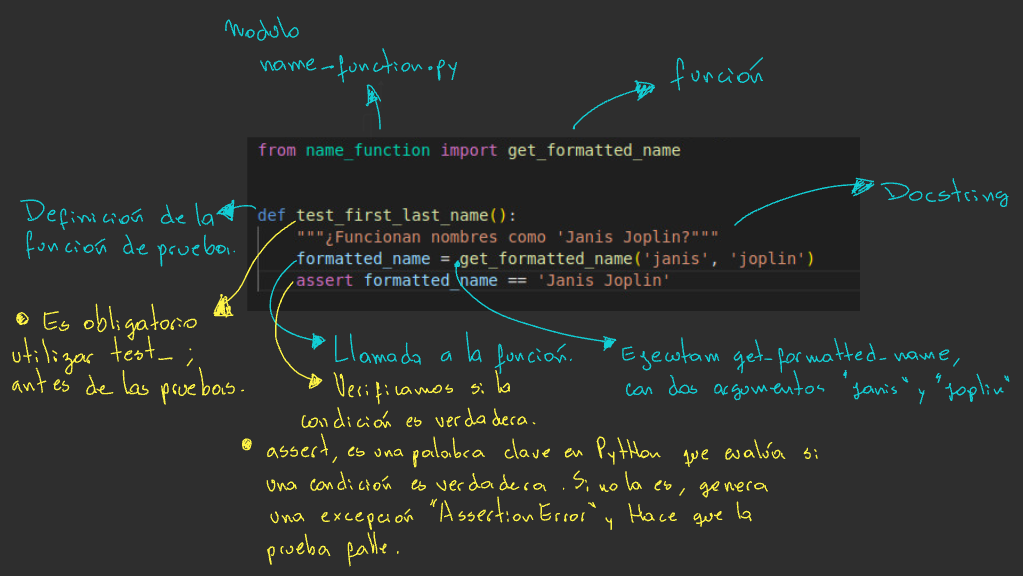

# Ejecutando una Prueba

Si ejecutas el archivo **`test_name_function.py`** directamente, no obtendrás ningún resultado porque nunca llamamos a la función de prueba. En su lugar, haremos que pytest ejecute el archivo de prueba por nosotros.

Para hacer esto, abre una ventana de terminal y navega a la carpeta que contiene el archivo de prueba. Si estás usando VS Code, puedes abrir la carpeta que contiene el archivo de prueba y usar la terminal integrada en la ventana del editor. En la ventana de la terminal, ingresa el comando `pytest`. Esto es lo que deberías ver:

```bash
$ pytest
========================= test session starts =========================
1 platform darwin -- Python 3.x.x, pytest-7.x.x, pluggy-1.x.x
2 rootdir: /.../python_work/chapter_11
3 collected 1 item
4 test_name_function.py . [100%]
========================== 1 passed in 0.00s ==========================
```

Intentemos entender este resultado. En primer lugar, vemos información sobre el sistema en el que se está ejecutando la prueba. Yo estoy probando esto en un sistema macOS, por lo que podrías ver una salida diferente aquí. Lo más importante es que podemos ver qué versiones de Python, pytest y otros paquetes se están utilizando para ejecutar la prueba.

A continuación, vemos el directorio desde el que se está ejecutando la prueba: en mi caso, `python_work/chapter_11`. Podemos ver que pytest encontró una prueba para ejecutar, y podemos ver el archivo de prueba que se está ejecutando. El punto único después del nombre del archivo nos indica que una única prueba pasó, y el 100% nos deja claro que todas las pruebas se han ejecutado. Un proyecto grande puede tener cientos o miles de pruebas, y los puntos y el indicador de porcentaje de ejecución pueden ser útiles para monitorear el progreso general de la ejecución de las pruebas.

La última línea nos dice que una prueba pasó y que tomó menos de 0.01 segundos ejecutar la prueba.

Este resultado indica que la función `get_formatted_name()` siempre funcionará para nombres que tienen un primer y un segundo nombre, a menos que modifiquemos la función. Cuando modifiquemos `get_formatted_name()`, podremos ejecutar esta prueba nuevamente. Si la prueba pasa, sabremos que la función seguirá funcionando para nombres como Janis Joplin.

**NOTA:** 

Si no estás seguro de cómo navegar hasta la ubicación correcta en la terminal, consulta "Ejecutar Programas de Python desde la Terminal" en la página 11. Además, si ves un mensaje de que el comando pytest no se encontró, usa el comando `python -m pytest` en su lugar.

# Una Prueba Fallida

¿Qué aspecto tiene una prueba fallida? Modifiquemos `get_formatted_name()` para que pueda manejar nombres intermedios, pero hagámoslo de una manera que rompa la función para nombres que solo tienen un primer y segundo nombre, como Janis Joplin.

Aquí tienes una nueva versión de `get_formatted_name()` que requiere un argumento para el nombre intermedio:

```python
# name_function.py
def get_formatted_name(first, middle, last):
    """Genera un nombre completo formateado de manera ordenada."""
    full_name = f"{first} {middle} {last}"
    return full_name.title()
```

Esta versión debería funcionar para personas con nombres intermedios, pero cuando la probemos, veremos que hemos roto la función para personas con solo un primer y segundo nombre.

Esta vez, al ejecutar pytest, obtenemos el siguiente resultado:

```bash
$ pytest
========================= test session starts =========================
--snip--
1 test_name_function.py F [100%]
2 ============================== FAILURES ===============================
3 ________________________ test_first_last_name _________________________
def test_first_last_name():
"""¿Funcionan nombres como 'Janis Joplin'?"""
4 > formatted_name = get_formatted_name('janis', 'joplin')
5 E TypeError: get_formatted_name() missing 1 required positional
argument: 'last' test_name_function.py:5: TypeError
======================= resumen de fallos ========================
FAILED test_name_function.py::test_first_last_name - TypeError:
get_formatted_name() missing 1 required positional argument: 'last'
========================== 1 failed in 0.04s ==========================
```

Hay mucha información aquí porque hay muchas cosas que podrías necesitar saber cuando una prueba falla. El primer elemento a destacar en el resultado es una única `F`, que nos indica que una prueba falló. Luego vemos una sección que se enfoca en los **FALLOS**, ya que las pruebas fallidas suelen ser lo más importante en lo que centrarse durante una ejecución de pruebas. A continuación, vemos que la función `test_first_last_name()` fue la que falló. Un corchete angular indica la línea de código que causó que la prueba fallara. La **E** en la siguiente línea muestra el error real que causó la falla: un `TypeError` debido a un argumento posicional requerido que falta, `last`. La información más importante se repite en un resumen más corto al final, para que cuando estés ejecutando muchas pruebas, puedas tener una idea rápida de qué pruebas fallaron y por qué.

# Respondiendo a una prueba fallida

¿Qué hacer cuando una prueba falla? Si estás verificando las condiciones correctas, una prueba exitosa significa que la función está funcionando correctamente, y una prueba fallida significa que hay un error en el código nuevo que escribiste. Así que, cuando una prueba falla, no cambies la prueba. Si lo haces, tus pruebas podrían pasar, pero cualquier código que llame a tu función, como lo hace la prueba, dejará de funcionar. En su lugar, arregla el código que está causando que la prueba falle. Examina los cambios que acabas de hacer en la función y descubre cómo esos cambios rompieron el comportamiento esperado.

En este caso, `get_formatted_name()` solía requerir solo dos parámetros: un nombre y un apellido. Ahora requiere un nombre, un segundo nombre y un apellido. La adición de ese parámetro obligatorio para el segundo nombre rompió el comportamiento original de `get_formatted_name()`. La mejor opción aquí es hacer que el segundo nombre sea opcional. Una vez que lo hagamos, nuestra prueba para nombres como Janis Joplin debería pasar nuevamente, y deberíamos ser capaces de aceptar nombres con segundo nombre también. Modifiquemos `get_formatted_name()` para que los segundos nombres sean opcionales y luego ejecutemos nuevamente el caso de prueba. Si pasa, avanzaremos a asegurarnos de que la función maneje los segundos nombres correctamente.

Para hacer que los segundos nombres sean opcionales, movemos el parámetro `middle` al final de la lista de parámetros en la definición de la función y le damos un valor predeterminado vacío. También agregamos una prueba `if` que construye el nombre completo correctamente, dependiendo de si se proporciona un segundo nombre:

```python
def get_formatted_name(first, last, middle=''):
    """Genera un nombre completo formateado de manera ordenada."""
    if middle:
        full_name = f"{first} {middle} {last}"
    else:
        full_name = f"{first} {last}"
    return full_name.title()
```

En esta nueva versión de `get_formatted_name()`, el segundo nombre es opcional. Si se pasa un segundo nombre a la función, el nombre completo contendrá un primer nombre, un segundo nombre y un apellido. De lo contrario, el nombre completo consistirá solo de un primer y un apellido. Ahora la función debería funcionar para ambos tipos de nombres. Para saber si la función aún funciona para nombres como Janis Joplin, ejecutemos nuevamente la prueba:

```bash
$ pytest
========================= Inicia la sesión de prueba =========================
--snip--
test_name_function.py . [100%]
========================== 1 pasada en 0.00s ==========================
```

La prueba ahora pasa. Esto es ideal; significa que la función funciona para nombres como Janis Joplin nuevamente, sin tener que probar la función manualmente. Arreglar nuestra función fue más fácil porque la prueba fallida nos ayudó a identificar cómo el nuevo código rompió el comportamiento existente.

# Agregando Nuevas Pruebas

Ahora que sabemos que `get_formatted_name()` funciona para nombres simples nuevamente, escribamos una segunda prueba para personas que incluyen un segundo nombre. Hacemos esto agregando otra función de prueba al archivo `test_name_function.py`:

```python
from name_function import get_formatted_name

def test_first_last_name():
    # ... código anterior ...

def test_first_last_middle_name():
    """¿Funcionan los nombres como 'Wolfgang Amadeus Mozart'?"""
    formatted_name = get_formatted_name('wolfgang', 'mozart', 'amadeus')
    assert formatted_name == 'Wolfgang Amadeus Mozart'
```

Nombramos esta nueva función `test_first_last_middle_name()`. El nombre de la función debe comenzar con `test_` para que la función se ejecute automáticamente cuando ejecutemos `pytest`. Nombramos la función para dejar claro qué comportamiento de `get_formatted_name()` estamos probando. Como resultado, si la prueba falla, sabremos inmediatamente qué tipos de nombres se ven afectados.

Para probar la función, llamamos a `get_formatted_name()` con un primer nombre, un apellido y un segundo nombre, y luego hacemos una afirmación de que el nombre completo devuelto coincide con el nombre completo (primer, segundo y apellido) que esperamos. Cuando ejecutamos `pytest` nuevamente, ambas pruebas pasan:

```python
$ pytest
========================= Inicia la sesión de prueba =========================
--snip--
collected 2 items
test_name_function.py .. [100%]
========================== 2 pasadas en 0.01s ==========================
```

Los dos puntos indican que dos pruebas pasaron, lo cual también es claro en la última línea de la salida. ¡Esto es genial! Ahora sabemos que la función sigue funcionando para nombres como Janis Joplin, y podemos estar seguros de que también funcionará para nombres como Wolfgang Amadeus Mozart.

# **Hazlo tu mismo**

**11-1. Ciudad, País:** 

* Escribe una función que acepte dos parámetros: el nombre de una ciudad y el nombre de un país. 
* La función debe devolver una sola cadena con el formato Ciudad, País, como por ejemplo Santiago, Chile. 
* Guarda la función en un módulo llamado `city_functions.py` y guarda este archivo en una nueva carpeta para que pytest no intente ejecutar las pruebas que ya hemos escrito.  
* Crea un archivo llamado `test_cities.py` que pruebe la función que acabas de escribir. 
* Escribe una función llamada `test_city_country()` para verificar que al llamar a tu función con valores como 'santiago' y 'chile', se obtenga la cadena correcta.
* Ejecuta la prueba y asegúrate de que `test_city_country()` pase.

**11-2. Población:** 

* Modifica tu función para que requiera un tercer parámetro, población. 
* Ahora debería devolver una sola cadena con el formato Ciudad, País – población xxx, como por ejemplo Santiago, Chile – población 5000000. 
* Ejecuta la prueba nuevamente y asegúrate de que esta vez falle `test_city_country()`.  
* Modifica la función para que el parámetro de población sea opcional. Ejecuta la prueba y asegúrate de que `test_city_country()` pase nuevamente.  
* Escribe una segunda prueba llamada `test_city_country_population()` que verifique que puedas llamar a tu función con los valores 'santiago', 'chile' y 'población=5000000'. Ejecuta las pruebas una vez más y asegúrate de que esta nueva prueba pase.

# Probando una Clase

En la primera parte de este capítulo, escribiste pruebas para una función simple. Ahora escribirás pruebas para una clase. Usarás clases en muchos de tus propios programas, por lo que es útil poder probar que tus clases funcionan correctamente. Si tienes pruebas aprobadas para una clase en la que estás trabajando, puedes estar seguro de que las mejoras que hagas en la clase no romperán accidentalmente su comportamiento actual.

# Una variedad de afirmaciones

Hasta ahora, has visto solo un tipo de afirmación: una afirmación de que una cadena tiene un valor específico. Al escribir una prueba, puedes hacer cualquier afirmación que pueda expresarse como una declaración condicional. Si la condición es `True` como se esperaba, tu suposición sobre cómo se comporta esa parte de tu programa se confirmará; puedes estar seguro de que no existen errores. Si la condición que asumes que es `True` en realidad es `False`, la prueba fallará y sabrás que hay un problema que resolver. La Tabla 11-1 muestra algunos de los tipos más útiles de afirmaciones que puedes incluir en tus pruebas iniciales.

**Tabla 11-1: Declaraciones de afirmación comúnmente usadas en pruebas**

| Afirmación                      | Afirmación                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| `assert a == b`                  | Afirma que dos valores son iguales.                                          |
| `assert a != b`                  | Afirma que dos valores no son iguales.                                      |
| `assert a`                       | Afirma que `a` evalúa como `True`.                                          |
| `assert not a`                   | Afirma que `a` evalúa como `False`.                                         |
| `assert element in list`         | Afirma que un elemento está en una lista.                                   |
| `assert element not in list`     | Afirma que un elemento no está en una lista.                                |

Estos son solo algunos ejemplos; cualquier cosa que pueda expresarse como una declaración condicional puede incluirse en una prueba.

# Una Clase para Probar

Probar una clase es similar a probar una función, porque mucho del trabajo implica probar el comportamiento de los métodos dentro de la clase. Sin embargo, hay algunas diferencias, así que vamos a escribir una clase para probar. Considera una clase que ayuda a administrar encuestas anónimas:


```python
# survey.py

class AnonymousSurvey:
    """Recoge respuestas anónimas a una pregunta de encuesta."""
    
    def __init__(self, question):
        """Almacena una pregunta y se prepara para almacenar respuestas."""
        self.question = question
        self.responses = []

    def show_question(self):
        """Muestra la pregunta de la encuesta."""
        print(self.question)

    def store_response(self, new_response):
        """Almacena una respuesta a la encuesta."""
        self.responses.append(new_response)

    def show_results(self):
        """Muestra todas las respuestas que se han dado."""
        print("Resultados de la encuesta:")
        for response in self.responses:
            print(f"- {response}")
```

Esta clase comienza con una pregunta de encuesta que tú proporcionas y contiene una lista vacía para almacenar las respuestas. La clase tiene métodos para imprimir la pregunta de la encuesta, agregar una nueva respuesta a la lista de respuestas y mostrar todas las respuestas almacenadas en la lista. Para crear una instancia de esta clase, solo tienes que proporcionar una pregunta. Una vez que tienes una instancia representando una encuesta particular, puedes mostrar la pregunta con `show_question()`, almacenar una respuesta usando `store_response()`, y mostrar los resultados con `show_results()`.

Para mostrar que la clase `AnonymousSurvey` funciona, escribimos un programa que usa la clase:


```python
# language_survey.py
from survey import AnonymousSurvey

# Definir una pregunta y hacer una encuesta.
question = "¿Qué idioma aprendiste a hablar primero?"
language_survey = AnonymousSurvey(question)

# Mostrar la pregunta y almacenar respuestas a la pregunta.
language_survey.show_question()
print("Escribe 'q' en cualquier momento para salir.\n")
while True:
    response = input("Idioma: ")
    if response == 'q':
        break
    language_survey.store_response(response)

# Mostrar los resultados de la encuesta.
print("\n¡Gracias a todos los que participaron en la encuesta!")
language_survey.show_results()
```

Este programa define una pregunta ("¿Qué idioma aprendiste a hablar primero?") y crea un objeto `AnonymousSurvey` con esa pregunta. El programa llama a `show_question()` para mostrar la pregunta y luego pide respuestas. Cada respuesta se almacena a medida que se recibe. Cuando todas las respuestas han sido ingresadas (el usuario escribe `q` para salir), `show_results()` imprime los resultados de la encuesta:

```python
¿Qué idioma aprendiste a hablar primero?
Escribe 'q' en cualquier momento para salir.
Idioma: Inglés
Idioma: Español
Idioma: Inglés
Idioma: Mandarín
Idioma: q
¡Gracias a todos los que participaron en la encuesta!
Resultados de la encuesta:
- Inglés
- Español
- Inglés
- Mandarín
```

Esta clase funciona para una encuesta anónima simple, pero digamos que queremos mejorar `AnonymousSurvey` y el módulo en el que se encuentra, `survey`. Podríamos permitir que cada usuario ingrese más de una respuesta, podríamos escribir un método para listar solo respuestas únicas y reportar cuántas veces se dio cada respuesta, o incluso podríamos escribir otra clase para administrar encuestas no anónimas. Implementar tales cambios podría afectar el comportamiento actual de la clase `AnonymousSurvey`. Por ejemplo, es posible que al intentar permitir que cada usuario ingrese respuestas múltiples, accidentalmente cambiemos cómo se manejan las respuestas individuales. Para asegurarnos de que no rompemos el comportamiento existente mientras desarrollamos este módulo, podemos escribir pruebas para la clase.

# Probando la clase AnonymousSurvey

Vamos a escribir una prueba que verifique un aspecto del comportamiento de la clase AnonymousSurvey. Escribiremos una prueba para verificar que una respuesta única a la pregunta de la encuesta se almacena correctamente:

```python
test_survey.py
from survey import AnonymousSurvey

def test_store_single_response():
    """Prueba que una respuesta única se almacene correctamente."""
    question = "¿Qué idioma aprendiste primero a hablar?"
    language_survey = AnonymousSurvey(question)
    language_survey.store_response('Inglés')
    assert 'Inglés' in language_survey.responses
```

Comenzamos importando la clase que queremos probar, `AnonymousSurvey`. La primera función de prueba verificará que cuando almacenamos una respuesta a la pregunta de la encuesta, esta respuesta terminará en la lista de respuestas de la encuesta. Un buen nombre descriptivo para esta función es `test_store_single_response()`. Si esta prueba falla, sabremos por el nombre de la función en el resumen de la prueba que hubo un problema al almacenar una sola respuesta en la encuesta.

Para probar el comportamiento de una clase, necesitamos crear una instancia de la clase. Creamos una instancia llamada `language_survey` con la pregunta "¿Qué idioma aprendiste primero a hablar?". Almacenamos una respuesta única, "Inglés", usando el método `store_response()`. Luego verificamos que la respuesta se haya almacenado correctamente asegurándonos de que "Inglés" esté en la lista `language_survey.responses`.

Por defecto, ejecutar el comando `pytest` sin argumentos ejecutará todas las pruebas que pytest descubra en el directorio actual. Para centrarnos en las pruebas de un solo archivo, pasamos el nombre del archivo de prueba que queremos ejecutar. Aquí ejecutamos solo la prueba que escribimos para `AnonymousSurvey`:

```python
$ pytest test_survey.py
========================= test session starts =========================
--snip--
test_survey.py . [100%]
========================== 1 passed in 0.01s ==========================
```

Esto es un buen comienzo, pero una encuesta solo es útil si genera más de una respuesta. Verifiquemos que se puedan almacenar correctamente tres respuestas. Para hacer esto, agregamos otro método a `TestAnonymousSurvey`:

```python
from survey import AnonymousSurvey

def test_store_single_response():  --snip--
def test_store_three_responses():
    """Prueba que tres respuestas individuales se almacenen correctamente."""
    question = "¿Qué idioma aprendiste primero a hablar?"
    language_survey = AnonymousSurvey(question)
    responses = ['Inglés', 'Español', 'Mandarín']
    for response in responses:
        language_survey.store_response(response)
    for response in responses:
        assert response in language_survey.responses
```

Llamamos a la nueva función `test_store_three_responses()`. Creamos un objeto de encuesta como lo hicimos en `test_store_single_response()`. Definimos una lista con tres respuestas diferentes, y luego llamamos a `store_response()` para cada una de estas respuestas. Una vez que se han almacenado las respuestas, escribimos otro bucle y verificamos que cada respuesta ahora esté en `language_survey.responses`.

Cuando ejecutamos el archivo de prueba nuevamente, ambas pruebas (para una respuesta única y para tres respuestas) pasan:

```python
$ pytest test_survey.py
========================= test session starts =========================
--snip--
test_survey.py .. [100%]
========================== 2 passed in 0.01s ==========================
```

Esto funciona perfectamente. Sin embargo, estas pruebas son un poco repetitivas, por lo que utilizaremos otra característica de `pytest` para hacerlas más eficientes.

# Usando Fixtures

En `test_survey.py`, creamos una nueva instancia de `AnonymousSurvey` en cada función de prueba. Esto está bien en el ejemplo corto en el que estamos trabajando, pero en un proyecto real con decenas o cientos de pruebas, esto sería problemático.

En las pruebas, un fixture ayuda a configurar un entorno de prueba. A menudo, esto significa crear un recurso que se usa en más de una prueba. Creamos un fixture en `pytest` escribiendo una función con el decorador `@pytest.fixture`. Un decorador es una directiva colocada justo antes de una definición de función; Python aplica esta directiva a la función antes de que se ejecute, para alterar cómo se comporta el código de la función. No te preocupes si esto suena complicado; puedes comenzar a usar decoradores de paquetes de terceros antes de aprender a escribirlos por ti mismo.

Vamos a usar un fixture para crear una única instancia de la encuesta que se pueda usar en ambas funciones de prueba en `test_survey.py`:

```python
import pytest
from survey import AnonymousSurvey

@pytest.fixture
def language_survey():
    """Una encuesta que estará disponible para todas las funciones de prueba."""
    question = "¿Qué idioma aprendiste primero a hablar?"
    language_survey = AnonymousSurvey(question)
    return language_survey

def test_store_single_response(language_survey):
    """Prueba que una respuesta única se almacene correctamente."""
    language_survey.store_response('Inglés')
    assert 'Inglés' in language_survey.responses

def test_store_three_responses(language_survey):
    """Prueba que tres respuestas individuales se almacenen correctamente."""
    responses = ['Inglés', 'Español', 'Mandarín']
    for response in responses:
        language_survey.store_response(response)
    for response in responses:
        assert response in language_survey.responses
```

Ahora necesitamos importar `pytest` porque estamos usando un decorador que se define en `pytest`. Aplicamos el decorador `@pytest.fixture` a la nueva función `language_survey()`. Esta función construye un objeto `AnonymousSurvey` y devuelve la nueva encuesta.

Observa que las definiciones de ambas funciones de prueba han cambiado; ahora cada función de prueba tiene un parámetro llamado `language_survey`. Cuando un parámetro en una función de prueba coincide con el nombre de una función con el decorador `@pytest.fixture`, el fixture se ejecutará automáticamente y el valor devuelto se pasará a la función de prueba. En este ejemplo, la función `language_survey()` proporciona a `test_store_single_response()` y `test_store_three_responses()` una instancia de `language_survey`.

No hay código nuevo en ninguna de las funciones de prueba, pero observa que se han eliminado dos líneas de cada función: la línea que definía la pregunta y la línea que creaba un objeto `AnonymousSurvey`.

Cuando ejecutamos el archivo de prueba nuevamente, ambas pruebas siguen pasando. Estas pruebas serían particularmente útiles cuando intentamos expandir `AnonymousSurvey` para manejar múltiples respuestas por cada persona. Después de modificar el código para aceptar múltiples respuestas, podríamos ejecutar estas pruebas y asegurarnos de que no hemos afectado la capacidad de almacenar una única respuesta o una serie de respuestas individuales.

La estructura anterior probablemente se ve complicada; contiene parte del código más abstracto que has visto hasta ahora. No es necesario que uses fixtures de inmediato; es mejor escribir pruebas que tengan mucho código repetitivo que no escribir ninguna prueba en absoluto. Solo debes saber que cuando hayas escrito suficientes pruebas y la repetición empiece a ser un problema, existe una forma bien establecida de manejar la repetición. Además, los fixtures en ejemplos simples como este realmente no hacen que el código sea más corto o más fácil de seguir. Pero en proyectos con muchas pruebas, o en situaciones donde se necesitan muchas líneas para construir un recurso que se usa en múltiples pruebas, los fixtures pueden mejorar drásticamente tu código de prueba.

Cuando quieras escribir un fixture, escribe una función que genere el recurso que será usado por múltiples funciones de prueba. Agrega el decorador `@pytest.fixture` a la nueva función y agrega el nombre de esta función como un parámetro en cada función de prueba que use este recurso. Tus pruebas serán más cortas y más fáciles de escribir y mantener a partir de ese momento.

# **Hazlo tu mismo**

**11-3. Empleado:**

* Escribe una clase llamada `Empleado`. El método `__init__()` debe tomar un nombre, un apellido y un salario anual, y almacenar cada uno de estos como atributos.
* Escribe un método llamado `dar_aumento()` que agregue $5,000 al salario anual por defecto, pero que también acepte un monto de aumento diferente.  
* Escribe un archivo de prueba para la clase `Empleado` con dos funciones de prueba: `test_dar_aumento_predeterminado()` y `test_dar_aumento_personalizado()`.
* Escribe tus pruebas una vez sin usar un fixture y asegúrate de que ambas pasen. 
* Luego, escribe un fixture para que no tengas que crear una nueva instancia de empleado en cada función de prueba. 
* Vuelve a ejecutar las pruebas y asegúrate de que ambas pruebas aún pasen.  

# **Resumen**  
En este capítulo, aprendiste a escribir pruebas para funciones y clases usando las herramientas del módulo `pytest`. Aprendiste a escribir funciones de prueba que verifican comportamientos específicos que tus funciones y clases deben exhibir. Viste cómo los fixtures pueden usarse para crear recursos de manera eficiente que puedan ser utilizados en varias funciones de prueba dentro de un archivo de pruebas.  

Las pruebas son un tema importante al que muchos programadores novatos no se exponen. No tienes que escribir pruebas para todos los proyectos simples que intentas como programador novato. Pero tan pronto como empieces a trabajar en proyectos que impliquen un esfuerzo significativo de desarrollo, deberías probar los comportamientos críticos de tus funciones y clases. Serás más confiado de que el trabajo nuevo en tu proyecto no romperá las partes que ya funcionan, y esto te dará la libertad de mejorar tu código. Si accidentalmente rompes una funcionalidad existente, lo sabrás de inmediato, así que podrás solucionar el problema fácilmente. Responder a una prueba fallida que ejecutaste es mucho más fácil que responder a un informe de error de un usuario molesto.  

Otros programadores respetarán más tus proyectos si incluyes algunas pruebas iniciales. Se sentirán más cómodos experimentando con tu código y estarán más dispuestos a trabajar contigo en proyectos. Si deseas contribuir a un proyecto en el que otros programadores están trabajando, se espera que demuestres que tu código pasa las pruebas existentes y generalmente se espera que escribas pruebas para cualquier nuevo comportamiento que introduzcas en el proyecto.  

Juega con las pruebas para familiarizarte con el proceso de probar tu código. Escribe pruebas para los comportamientos más críticos de tus funciones y clases, pero no busques una cobertura total en los primeros proyectos a menos que tengas una razón específica para hacerlo.  